In [10]:
#Importing necessary library
import numpy as np
import pandas as pd # pandas was not imported in this session
import matplotlib.pyplot as plt

data = pd.read_csv("/spam.csv")
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data.shape

(5572, 2)

In [13]:
data['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

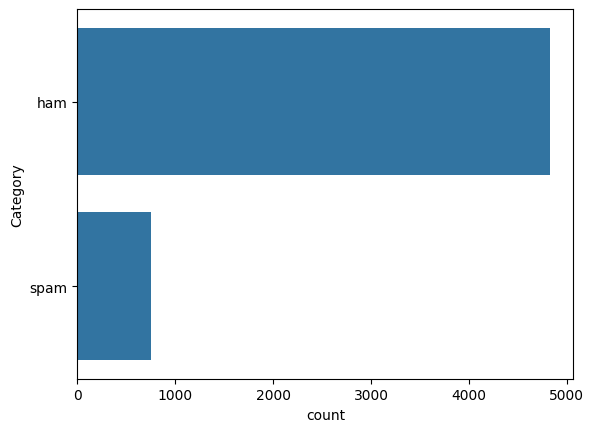

In [15]:
import seaborn as sns
sns.countplot(data['Category'])

In [16]:
data.duplicated().sum()

415

In [17]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [18]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [19]:
data.shape

(5157, 2)

In [20]:
5572 - 415

5157

<Axes: xlabel='count', ylabel='Category'>

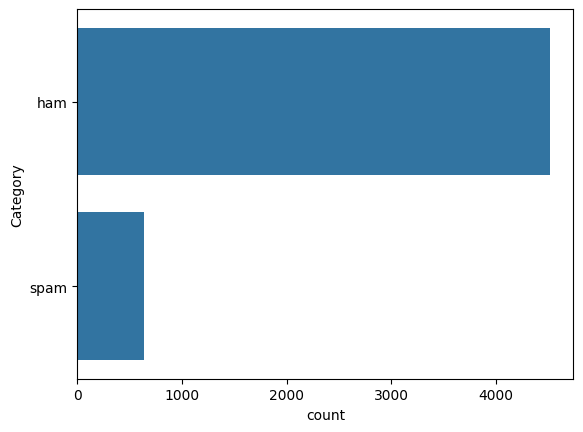

In [21]:
sns.countplot(data['Category'])

In [22]:
data['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

In [23]:
X = data['Message'].values
y = data['Category'].values

y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)
X_train.shape



(4125,)

In [25]:
X_test.shape

(1032,)

In [26]:
y_train.shape

(4125,)

In [27]:
y_test.shape

(1032,)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
len(x_train.toarray())

4125

In [30]:
len(x_train.toarray()[0])

7628

In [31]:
from sklearn.feature_extraction.text import CountVectorizer # make sure you have imported CountVectorizer
cv = CountVectorizer()
x_train = cv.fit_transform(X_train) # make sure X_train is defined and accessible in your environment.
x_train.toarray()

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train) # make sure y_train is defined and accessible in your environment.

MultinomialNB()

In [32]:
x_test = cv.transform(X_test)
len(x_test.toarray())

1032

In [33]:
len(x_test.toarray()[0])

7628

In [34]:
y_pred = nb.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.9864341085271318

In [38]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.992969696969697

In [40]:
spam = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

In [41]:
clean_email = cv.transform(spam)

In [42]:
len(clean_email.toarray()[0])

7628

In [43]:
check = nb.predict(clean_email)[0]
check

'ham'

In [44]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!
